In [1]:
# Importing liabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Part - A : Cleaning the data

#### 1.	Implement a sensible approach for dealing with the missing data.
#### 2.	Change all the values in the dataset into numerical values.
#### 3.	Substitute dummy columns for the categorical variables
#### 4.	Eliminate any columns from the data that may not be relevant to your objectives. 



In [2]:
#Importing data
data = pd.read_csv("C:\\adult-entire dataset.csv")
data

,age,workClass,Education,marital-status,occupation,race,sex,hours-per-week,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   hours-per-week  32561 non-null  int64 
 8   Income          32561 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.2+ MB


In [4]:
data.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [5]:
data.rename(columns = {'marital-status':'marital_status', 'hours-per-week':'hours'}, inplace= True)
print(data.columns)

Index(['age', 'workClass', 'Education', 'marital_status', 'occupation', 'race',
       'sex', 'hours', 'Income'],
      dtype='object')


In [6]:
#Finding columns with null values or incorrect data.

print(f"\nUnique values in Age : {data.age.unique()}\n {len(data.age.unique())} unique elements")
print("\nUnique values in Workclass : \n", data.workClass.unique())
print("\nUnique values in Education : \n", data.Education.unique())
print("\nUnique values in Marriage status : \n", data.marital_status.unique())
print("\nUnique values in Occupation : \n", data.occupation.unique())
print("\nUnique values in Race : \n", data.race.unique())
print("\nUnique values in Sex : \n", data.sex.unique())
print("\nUnique values in Hour per week : \n", data.hours.unique())
print("\nUnique values in Income : \n", data.Income.unique())
print("\n We infer from this that columns: Workclass and Occupation have missing values in them \n ")


Unique values in Age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
 73 unique elements

Unique values in Workclass : 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in Education : 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in Marriage status : 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values in Occupation : 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' '

In [7]:
print("Number of missing values in WorkClass column : ", data["workClass"].value_counts()[" ?"])
print("Number of missing values in Occupation column : ", data["occupation"].value_counts()[" ?"])

Number of missing values in WorkClass column :  1836
Number of missing values in Occupation column :  1843


In [8]:
#OLD APPROACH

#Finding which values occur the most in the above columns

#print("private: ", data["workClass"].value_counts()[' Private'])
#print("prof speciality: ", data["occupation"].value_counts()[' Prof-specialty'])
#print("Since the missing values count for only 5% of the total data, we will replace the '?' with the value that occurs \nthe most in the dataset")


# Replacing ? with most frequently occuring values in the dataset

#data['workClass'].replace({' ?': ' Private'}, inplace=True)
#data['occupation'].replace({' ?': ' Prof-specialty'}, inplace=True)

In [9]:
# Converting numerical data to categorical data

label_encoder = preprocessing.LabelEncoder()

data['workClass'] = label_encoder.fit_transform(data['workClass'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['race'] = label_encoder.fit_transform(data['race'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['Income'] = label_encoder.fit_transform(data['Income'])

C:\Users\vchaudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


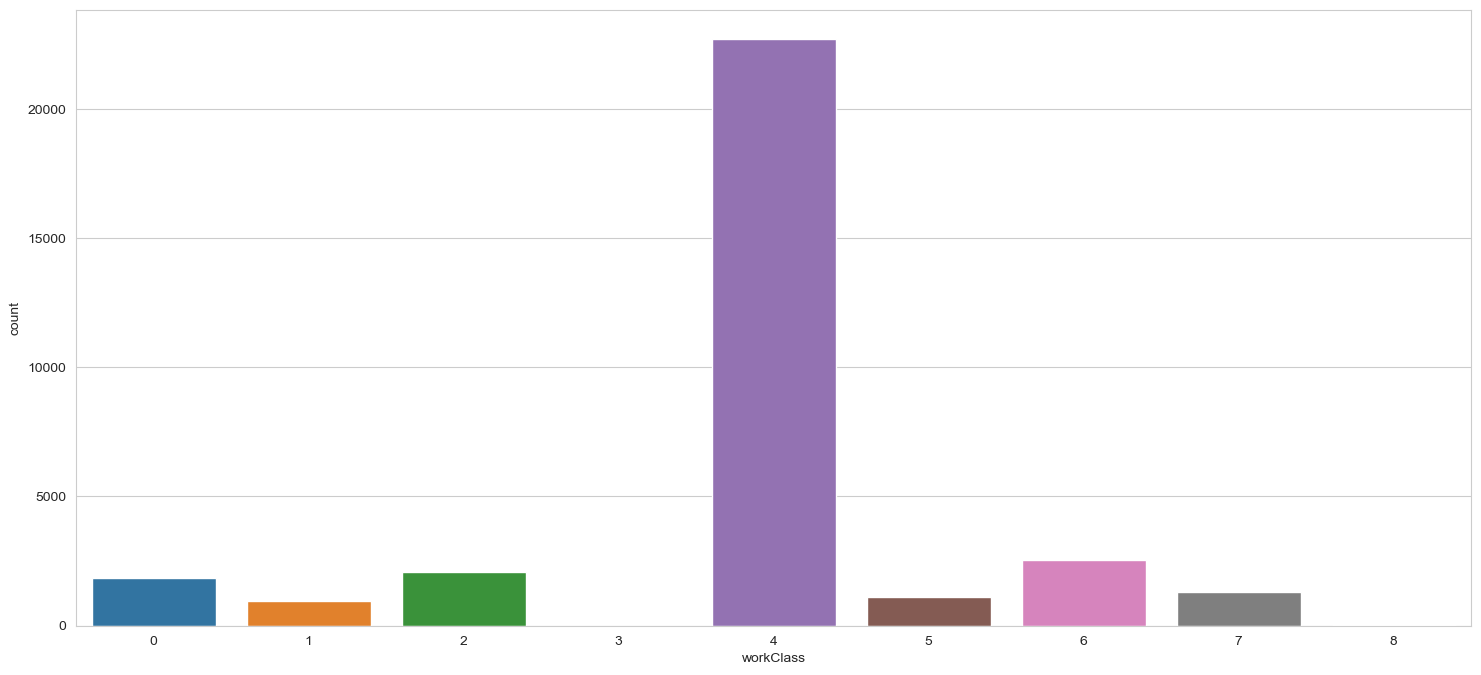

C:\Users\vchaudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


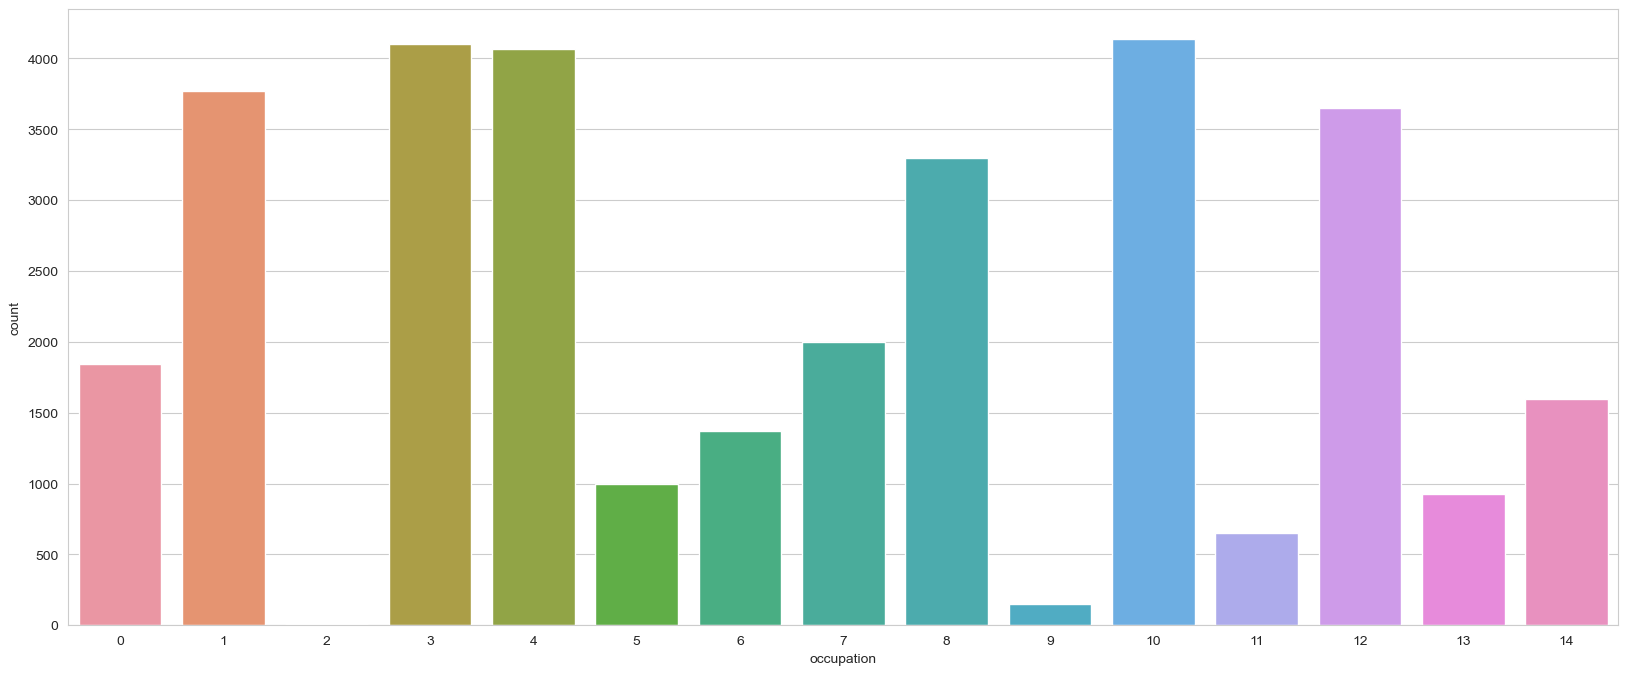

In [10]:
# %matplotlib inline
# plt.bar(data["workClass"],  )
# plt.figure(figsize=(8,0))
# plt.show()
#y= sns.histplot(data=data["workClass"],  bins=10)
#plt.show()

sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
sns.countplot(data['workClass'])
plt.show()

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.countplot(data['occupation'])
plt.show()



### Replacing '?' with the most frequent values in the dataset will produce incorrect results, the best way to deal with this is using a dummy field i.e "Unknown" value to replace the '?' columns. This will not hamper the original nature of the data as well as handle the missing values.



In [11]:
data['workClass'].replace(' ?', 'Unknown', inplace=True)
data['occupation'].replace(' ?', 'Unknown', inplace=True)

C:\Users\vchaudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


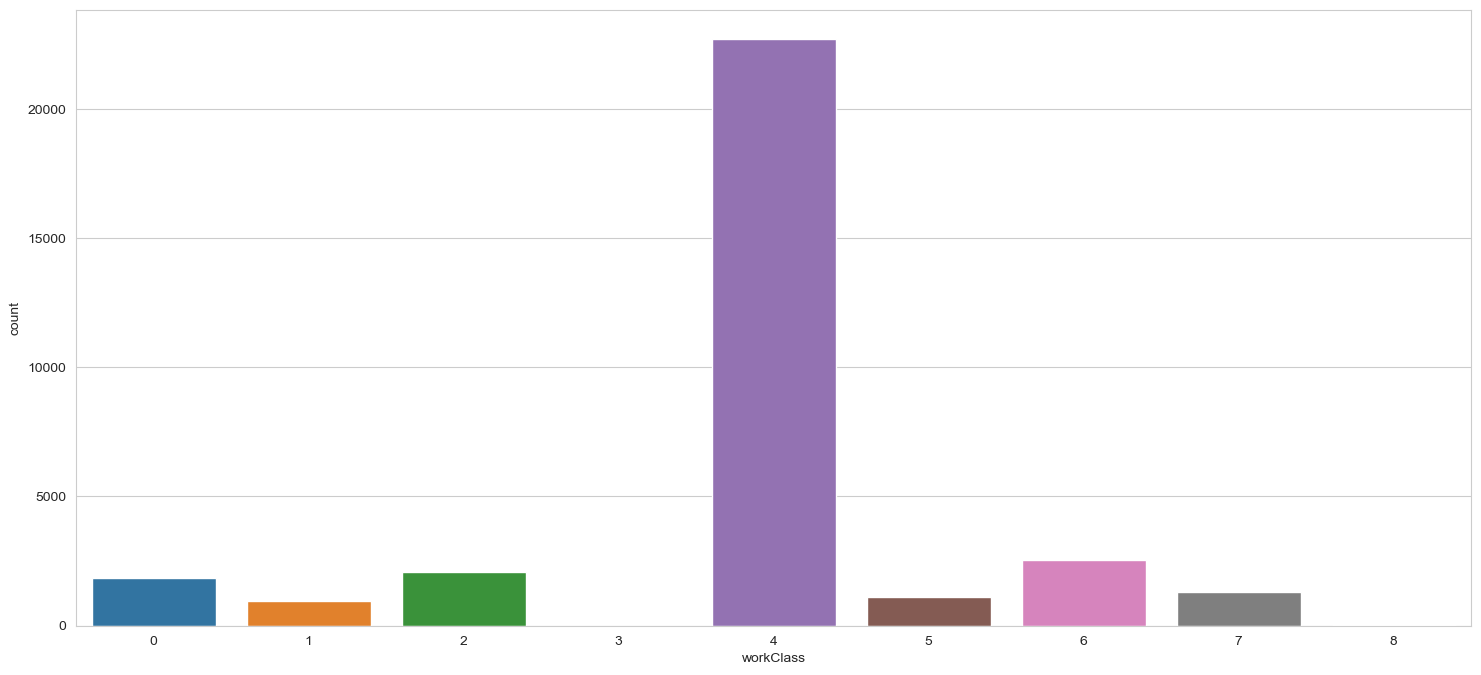

C:\Users\vchaudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


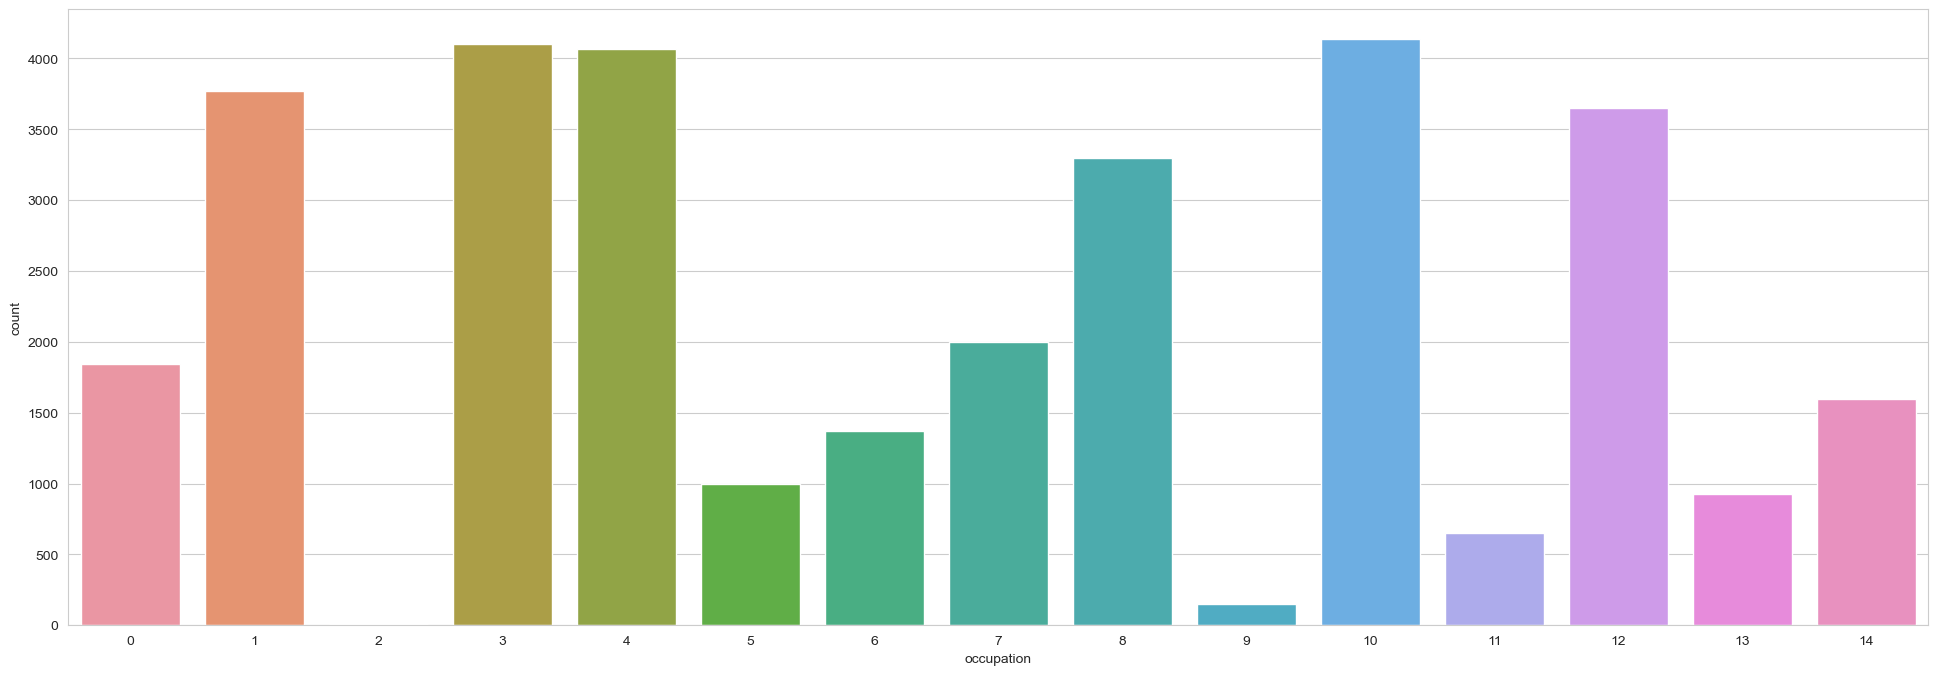

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
sns.countplot(data['workClass'])
plt.show()
sns.set_style("whitegrid")
plt.figure(figsize=(24,8))
sns.countplot(data['occupation'])
plt.show()


# PART B : Dimentionality reduction

#### 1.	Apply the concept of dimensionality reduction to this dataset to reduce the size of the data and computational time needed for #### You should do the analysis in two different ways: 
#### a.	Using the Singular Value Decomposition (SVD) method as implemented in class.
#### b.	Using the Scikit-Learn library function PCA.
#### In each case, show the eigenvectors and eigenvalues.
#### 2.	Show the Scree plot. 
#### 3.	How many dimensions of the dataset should be used to retain over 90% of the data variance? 


In [13]:
# Dimenionality reduction


# Assiging data to X and y
X = data.drop(['Income'], axis = 1)
y = data['Income']
#X = X.to_numpy()
#y = y.to_numpy()
print(X.shape, y.shape)

(32561, 8) (32561,)


In [14]:
# Training data and splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 49)
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Intercept=',lm.intercept_, '\n\nCoeff =', lm.coef_)


Intercept= -0.4034082550209086 

Coeff = [ 0.00585691 -0.00209421  0.00825232 -0.02734924  0.00581058  0.02008612
  0.12576683  0.00536175]


In [15]:
#OLD APPROACH
# A = U . Sigma . V^T
#Where A is the real m x n matrix that we wish to decompose, U is an m x m matrix, 
#Sigma (often represented by the uppercase Greek letter Sigma) is an m x n diagonal matrix, 
#and V^T is the  transpose of an n x n matrix where T is a superscript.

# U
#X.shape
#m x n = 32561 x 54 
#X x X.T = m x m
#U = np.dot(X, X.T)
# sigma
#Sigma = np.diag(X)
#V^T
#print(U.shape, Sigma.shape)
#X_train.shape

In [16]:
#PCA by SCI-KIT LEARN

pca = PCA(n_components = len(data.columns)-1)
xpca = pca.fit_transform(X_train)


In [17]:
xpca
eigenvalues = pca.explained_variance_
print("Eigenvalues using PCA: \n \n", eigenvalues)
eigenvectors = pca.components_
print("\nEigenvectors using PCA:\n\n ", eigenvectors)

Eigenvalues using PCA: 
 
 [190.90321291 149.16970942  17.93374838  14.90923011   2.08626816
   1.88380827   0.72325507   0.20475802]

Eigenvectors using PCA:

  [[ 9.44243120e-01  3.79619496e-03  4.40845291e-03 -3.39451967e-02
   1.68826248e-03  2.31123586e-03  4.99099965e-03  3.27392281e-01]
 [-3.27834718e-01  1.53318840e-02  1.88081429e-02 -1.01604047e-02
   3.37213105e-02  1.93066563e-03  7.24114296e-03  9.43736755e-01]
 [ 9.18849318e-03  9.18913445e-02 -1.49433791e-01  2.26545051e-03
   9.83945515e-01  1.58187449e-03  7.31217691e-03 -3.05158245e-02]
 [-3.08315665e-03 -2.54156396e-02 -9.88425424e-01  1.13527814e-02
  -1.47006823e-01 -2.92839396e-03  4.04347819e-03  2.43906325e-02]
 [ 2.46493606e-02 -5.02549301e-01  1.61957228e-02  8.59100248e-01
   4.82907607e-02 -6.72578306e-02 -3.27740765e-02  2.43170406e-02]
 [ 1.50055746e-02  8.57749719e-01 -4.10487147e-03  5.07078636e-01
  -8.20822164e-02  1.23352730e-02  2.21926812e-03 -2.90554705e-04]
 [ 1.87884509e-04  4.57158557e-02  1.270

In [18]:
# Singular value Decomposition

U, s, VT = np.linalg.svd(X_train)


In [19]:
print('Eigen-vectors: U=\n\n', U, U.shape,'\n')
print('Eigen-values: s=\n\n', s, s.shape)
print('Eigen-vectors: VT=', VT.shape,'\n')


Eigen-vectors: U=

 [[-6.70672073e-03  1.59082624e-03 -5.55428341e-03 ... -5.94206600e-03
  -7.75903598e-03 -6.69415980e-03]
 [-5.59527327e-03  6.88269290e-03 -3.84316825e-03 ... -3.46925385e-03
  -1.07080919e-02  8.22168192e-03]
 [-7.49229941e-03  5.91781899e-03 -3.31514337e-03 ...  2.93285306e-03
  -8.55119460e-03  9.35926251e-03]
 ...
 [-6.37710034e-03  1.05892815e-03  1.65569202e-06 ...  9.99656322e-01
   4.94216419e-05  1.32088944e-04]
 [-7.59247812e-03 -2.98886879e-03 -2.13742485e-03 ...  5.27766800e-05
   9.99452190e-01  1.96839947e-04]
 [-6.81115121e-03  1.17594054e-03 -6.25180769e-03 ...  1.29242104e-04
   2.04301424e-04  9.99543753e-01]] (19536, 19536) 

Eigen-values: s=

 [8226.37672333 1757.6521431   660.47688874  580.30696959  246.55423824
  199.52041964  136.46277853   63.28167255] (8,)
Eigen-vectors: VT= (8, 8) 



In [20]:
#Transforming the data
Ur = -U[:, 0:2]
print('Ur=\n', Ur)
Xr = np.dot(X_train.T, Ur)
print("\nTransformed data :\n\n ", Xr)



Ur=
 [[ 0.00670672 -0.00159083]
 [ 0.00559527 -0.00688269]
 [ 0.0074923  -0.00591782]
 ...
 [ 0.0063771  -0.00105893]
 [ 0.00759248  0.00298887]
 [ 0.00681115 -0.00117594]]

Transformed data :

  [[ 5560.07089131  1279.41782227]
 [  531.48433423   -32.34238869]
 [ 1410.25841005   -61.66712119]
 [  341.63612466   -27.57719895]
 [  906.25644788   -72.7171017 ]
 [  500.30856555   -13.11839877]
 [   94.04395885    -7.99408494]
 [ 5769.7844309  -1200.54069139]]


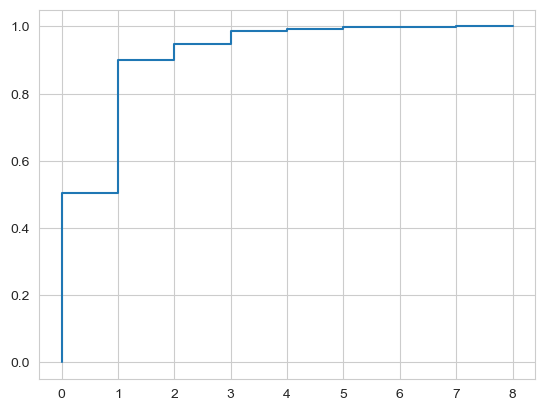

sv = [0.         0.5052836  0.90010675 0.94757389 0.98703571 0.99255766
 0.99754373 0.99945805 1.        ]


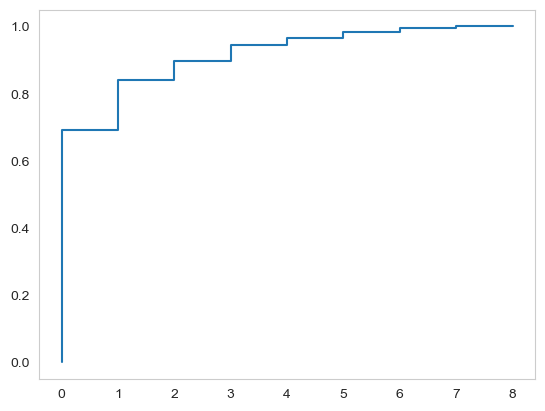

pca = [0.         0.69300243 0.84106971 0.89670928 0.94559522 0.96636532
 0.98317322 0.99466906 1.        ]


In [21]:
# The Scree plot


sv = np.cumsum(pca.explained_variance_)/sum(pca.explained_variance_)
# np.insert(sv, 0, 0) - insert the value 0 in position 0 of array sv
sv = np.insert(sv, 0, 0)


plt.step(list(range(len(sv))), sv)
plt.show()
print('sv =', sv)

Sv = np.cumsum(s)/sum(s)
# np.insert(sv, 0, 0) - insert the value 0 in position 0 of array sv
Sv = np.insert(Sv, 0, 0)
plt.step(list(range(len(Sv))), Sv)
plt.grid()
plt.show()

print('pca =', Sv)


In [22]:
#How many dimensions of the dataset should be used to retain over 90% of the data variance? 
k = np.argmax(sv >= 0.9) + 1
k

3

#### Hence, number of dimensions of the dataset should be used to retain over 90% of the data variance is : 3

# Part C: Model Training
#### a.	Use the multi-layer Perceptron to build a predictive neural network model. Use a suitable number of neurons and hidden layers.  Show the confusion matrix and the classification report when you use the trained network on the test dataset.

#### b.	Use Logistic Regression from the Scikit library to create a model. Show the confusion matrix and the classification report when you use the trained network on the test dataset.

#### c.	Same as question b, using the Naïve Bayes algorithm. 

#### d.	Use the K-Means clustering algorithm on the dataset without including the income column. What is the accuracy obtained in predicting the income.


In [23]:
# a.Use the multi-layer Perceptron to build a predictive neural network model.
#Use a suitable number of neurons and hidden layers.  Show the confusion matrix and the classification report when you use the trained network on the test dataset.

mlp = MLPClassifier(hidden_layer_sizes=(100,50,50, 2), activation='relu',solver='adam',random_state=1, max_iter=300)
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50, 50, 2), max_iter=300, random_state=1)

81.44337811900192 %


<AxesSubplot:>

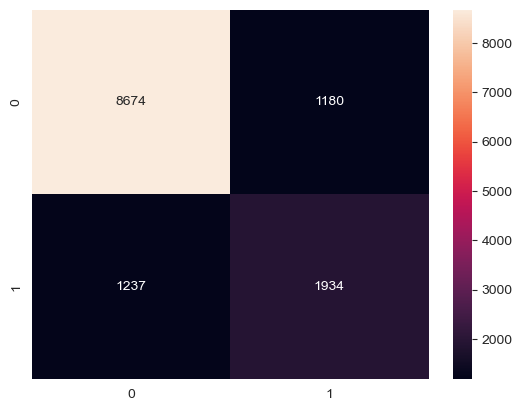

In [24]:
ypred = mlp.predict(X_test)
print(mlp.score(X_test, y_test)*100, "%")
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt ='.0f')


In [25]:
# b. Use Logistic Regression from the Scikit library to create a model. 
#Show the confusion matrix and the classification report when you use the trained network on the test dataset.

lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

75.47792706333973 %
Confusion Matrix:
 [[9262  592]
 [2602  569]]


<AxesSubplot:>

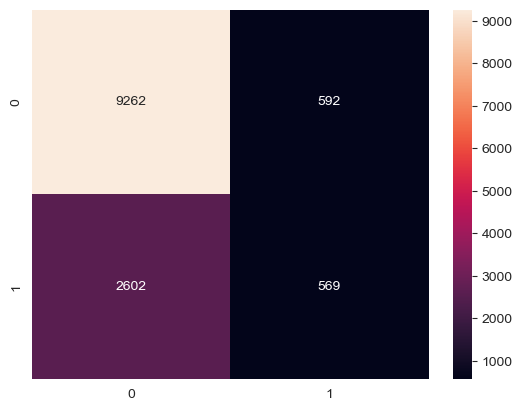

In [26]:
logpred = lr.predict(X_test)
logcm = confusion_matrix(y_test, logpred)
print(accuracy_score(y_test, logpred)*100, "%")
print("Confusion Matrix:\n", logcm)
sns.heatmap(logcm, annot=True, fmt ='.0f')


In [27]:
#c.Same as question b, using the Naïve Bayes algorithm. 
gnb = GaussianNB()
gnb.fit(X_test, y_test)


GaussianNB()

76.73704414587333 %
Confusion Matrix:



<AxesSubplot:>

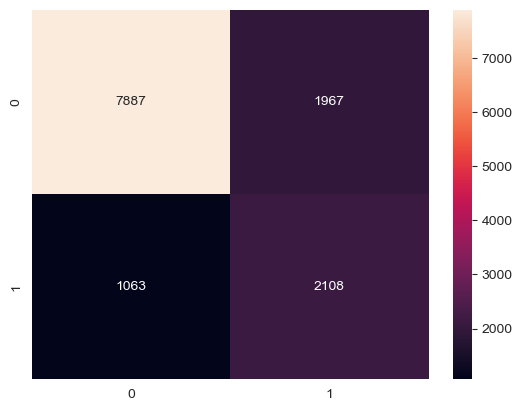

In [28]:
gnbpred = gnb.predict(X_test)
print(accuracy_score(y_test, gnbpred)*100, "%")
print("Confusion Matrix:\n")
gnbcm = confusion_matrix(y_test, gnbpred)
sns.heatmap(gnbcm, annot=True, fmt ='.0f')

In [29]:
#d.Use the K-Means clustering algorithm on the dataset without including the income column. 
#What is the accuracy obtained in predicting the income.

Kmean = KMeans(n_clusters=2)
label = Kmean.fit(X_train)

In [30]:
kpred = Kmean.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print("Accuracy of Kmeans clustering: ", accuracy_score(y_test, kpred)*100,"%")

Accuracy of Kmeans clustering:  63.18618042226487 %
